Step 1: Importing all libraries

# 🚗 Car Price Prediction Using Machine Learning

🎯 **Project Objective**

<span style="font-size:18px; color:#2E86C1;">
In this project, we aim to predict car prices using machine learning models based on features such as <b>car brand</b>, <b>fuel type</b>, <b>mileage</b>, and other important attributes.
</span>

### 🤖 **Models Compared**
We have implemented and evaluated the performance of the following algorithms:

- ✅ **Linear Regression**
- ✅ **Decision Tree Regressor**
- ✅ **Random Forest Regressor**

Our goal is to analyze and compare their accuracy and prediction performance on real-world car data.

---


In [1]:
# Step 1: Importing all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Importing all sklearn tools for the project
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler #Beacuse we are using Linear Regression Bcuz LR is sensitive to feature scales
from sklearn.model_selection import RandomizedSearchCV
import joblib

Step 2: Load Dataset and show first 5 rows

In [2]:
#Step 2: Load Dataset and show first 5 rows
df=pd.read_csv('D:/Car_Price_Prediction_ML_Project/dataset/CarPrice_Assignment.csv')

#Display first 5 rows in Dataset
print(df.head())

   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \

Step 3: Explore the Dataset

In [3]:
#Step 3: Explore the Dataset
print("Shape of Dataset:",df.shape)
print()
#Dataset information
print(df.info)

Shape of Dataset: (205, 26)

<bound method DataFrame.info of      car_ID  symboling                   CarName fueltype aspiration  \
0         1          3        alfa-romero giulia      gas        std   
1         2          3       alfa-romero stelvio      gas        std   
2         3          1  alfa-romero Quadrifoglio      gas        std   
3         4          2               audi 100 ls      gas        std   
4         5          2                audi 100ls      gas        std   
..      ...        ...                       ...      ...        ...   
200     201         -1           volvo 145e (sw)      gas        std   
201     202         -1               volvo 144ea      gas      turbo   
202     203         -1               volvo 244dl      gas        std   
203     204         -1                 volvo 246   diesel      turbo   
204     205         -1               volvo 264gl      gas      turbo   

    doornumber      carbody drivewheel enginelocation  wheelbase  ...  \
0

In [4]:
#Statistical summary
print(df.describe())

           car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844

Step 4: Data Preprocessing

In [5]:
#Step 4: Data Preprocessing
#Find Missing values
print("Data Preprocessing:")
print(df.isnull().sum())
df.duplicated().sum().sum()

Data Preprocessing:
car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


np.int64(0)

Step 5: Dropping the unnecessary Columns

In [6]:
#Step 5: Dropping the unnecessary Columns
df.drop(['car_ID','symboling','CarName'],axis=1,inplace=True)
print(df.head)

<bound method NDFrame.head of     fueltype aspiration doornumber      carbody drivewheel enginelocation  \
0        gas        std        two  convertible        rwd          front   
1        gas        std        two  convertible        rwd          front   
2        gas        std        two    hatchback        rwd          front   
3        gas        std       four        sedan        fwd          front   
4        gas        std       four        sedan        4wd          front   
..       ...        ...        ...          ...        ...            ...   
200      gas        std       four        sedan        rwd          front   
201      gas      turbo       four        sedan        rwd          front   
202      gas        std       four        sedan        rwd          front   
203   diesel      turbo       four        sedan        rwd          front   
204      gas      turbo       four        sedan        rwd          front   

     wheelbase  carlength  carwidth  carheigh

In [7]:
#check for inconsistencies in categorical columns:
for col in df.select_dtypes(include='object'):
    print(df[col].unique())

['gas' 'diesel']
['std' 'turbo']
['two' 'four']
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
['rwd' 'fwd' '4wd']
['front' 'rear']
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


In [8]:
df.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


Step 6: Exploratory Data Analysis(EDA):Understand the relationship between features and price

Exploratory Data Analysis of Target Variable
Check for skewness using histogram and outliers using boxplot


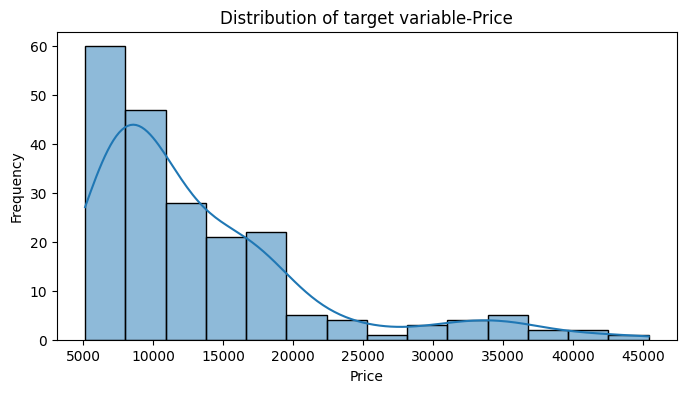

Target variable skewness:
1.7776781560914454
Check outliers in data:


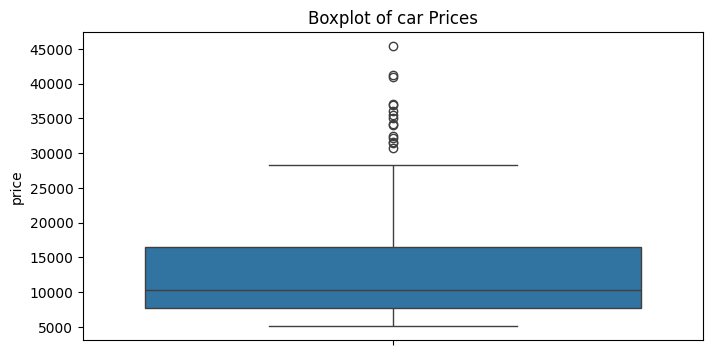

In [9]:
#Step 6: Exploratory Data Analysis(EDA):Understand the relationship between features and price
print("Exploratory Data Analysis of Target Variable")
print("Check for skewness using histogram and outliers using boxplot")
plt.figure(figsize=(8, 4))
his=sns.histplot(df['price'],kde=True)
plt.title("Distribution of target variable-Price")
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

#Check Skewness
print("Target variable skewness:")
print(df['price'].skew())

#Check outliers
plt.figure(figsize=(8, 4))
print("Check outliers in data:")
box=sns.boxplot(df['price'])
plt.title('Boxplot of car Prices')
plt.show()


Skewness in Dataset:

1.The target variable (Price) is right-skewed with a skewness value of 1.77, indicating that the distribution has a longer tail on the right side.
2.This suggests that most cars are priced in the lower range, with a few very expensive cars pulling the average price higher.

Outliers in price

1.The boxplot confirms the presence of outliers, likely representing luxury or premium vehicles.
2.These outliers are valid data points and will be retained for now. However, skewness might be addressed later during feature transformation to improve model performance.


Exploratory Data Analysis of Input Features
1. Numerical features-Check for skewness by histogram and Outliers by Boxplot


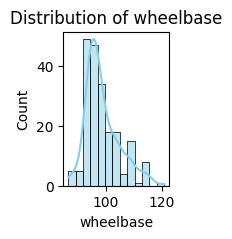

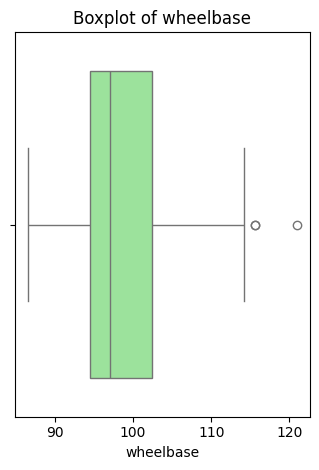

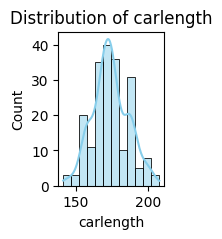

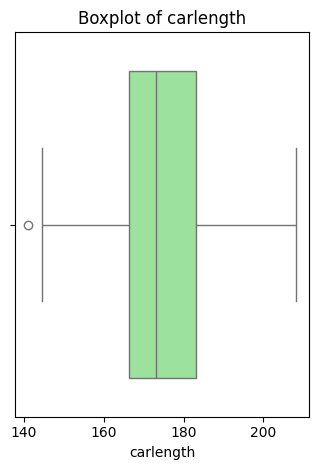

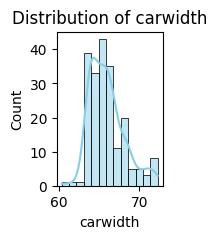

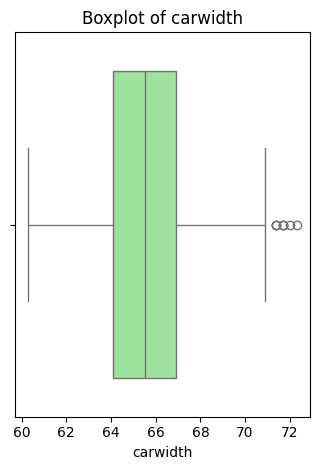

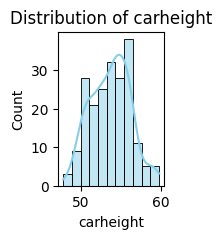

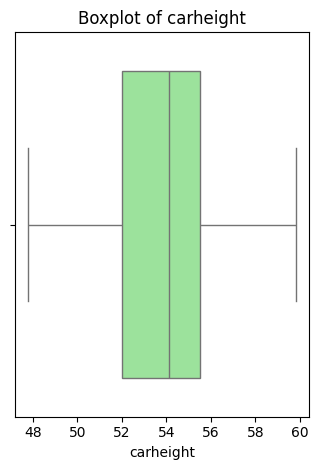

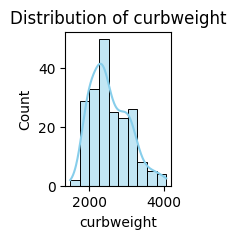

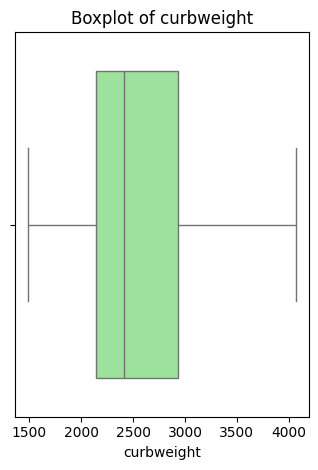

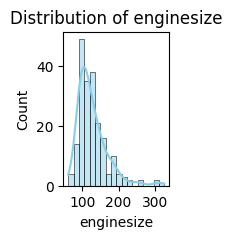

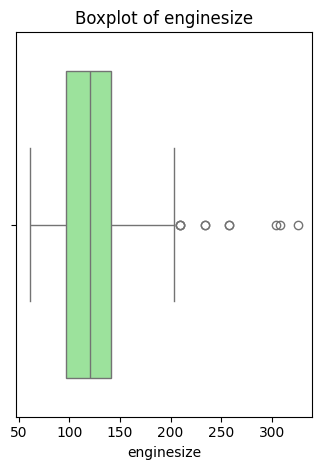

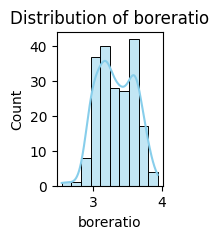

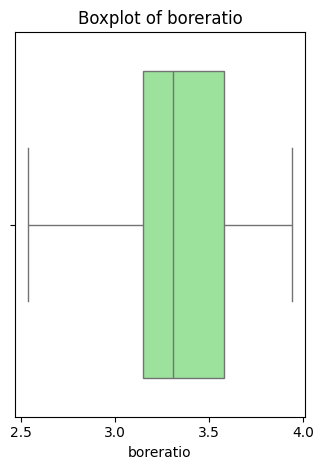

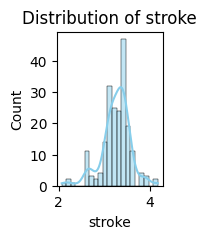

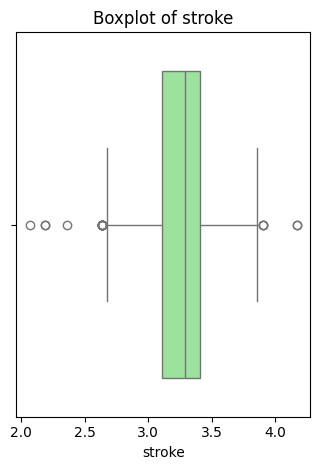

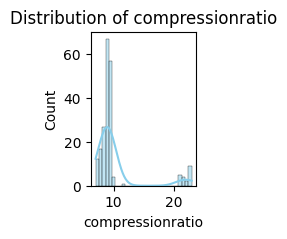

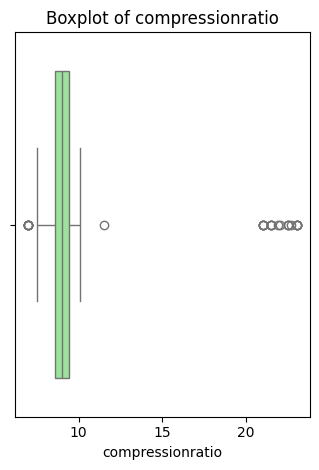

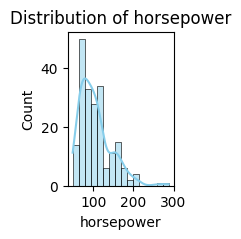

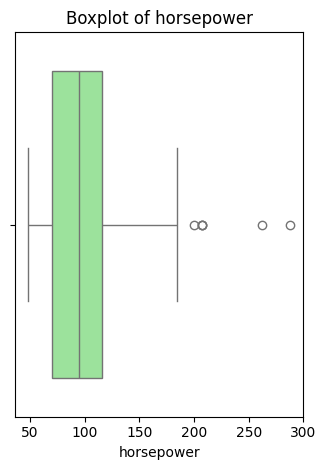

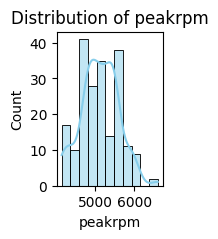

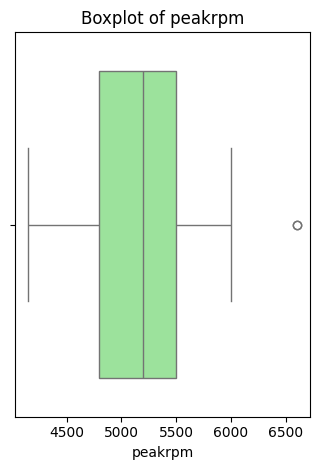

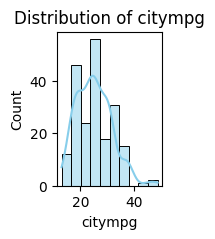

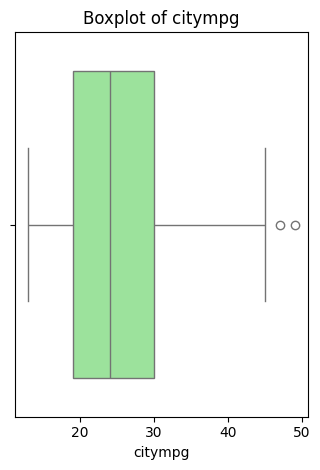

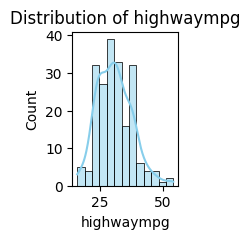

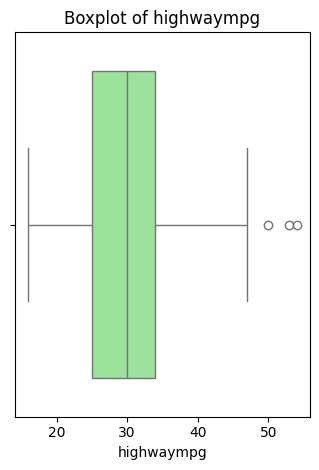

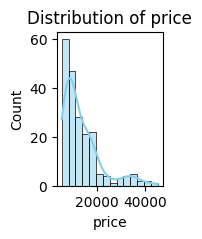

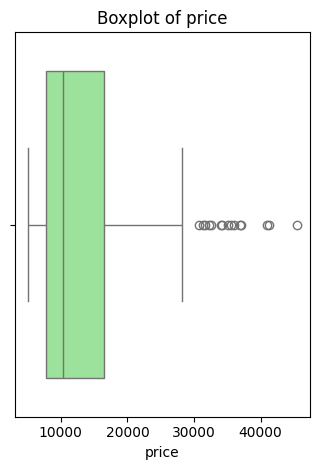

In [10]:
print("Exploratory Data Analysis of Input Features") #Check for skewness and outliers in numerical variables
print("1. Numerical features-Check for skewness by histogram and Outliers by Boxplot")
numerical_cols=df.select_dtypes(include=['int64','float64']).columns

for col in numerical_cols:
    plt.figure(figsize=(3,2))

    #Histogram
    plt.subplot(1,2,1)
    sns.histplot(df[col],kde=True,color='skyblue')
    plt.title(f"Distribution of {col}")
    plt.show()

    #Boxplot
    plt.subplot(1,2,1)
    sns.boxplot(x=df[col],color='lightgreen')
    plt.title(f"Boxplot of {col}")

    plt.tight_layout()
    plt.show()


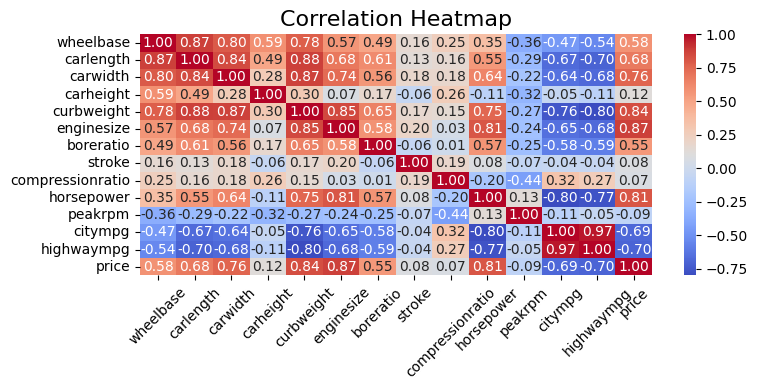

In [11]:
plt.figure(figsize=(8, 4))

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric_df.corr()

# Plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap", fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


Now to understand how each category impacts price:-


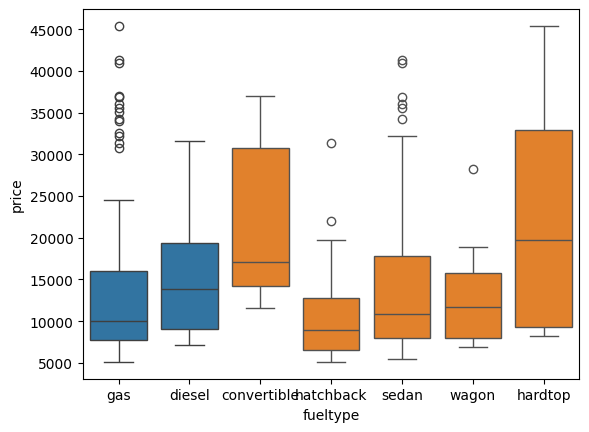

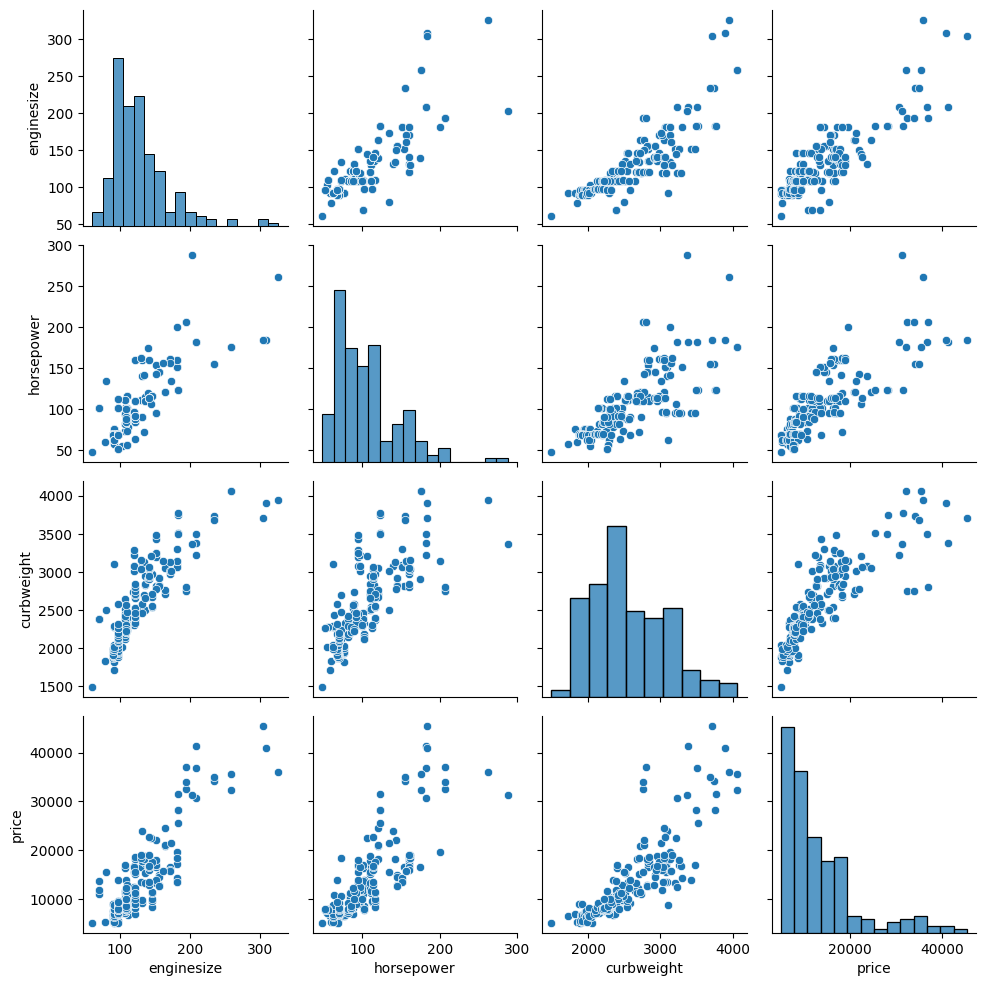

In [12]:
print("Now to understand how each category impacts price:-")
sns.boxplot(x='fueltype', y='price', data=df)
sns.boxplot(x='carbody', y='price', data=df)
plt.show()
sns.pairplot(df, vars=['enginesize', 'horsepower', 'curbweight', 'price'])
plt.show()

Step 7: Data Encoding ( To convert categorical columns to 0 and 1 )

In [13]:
#Step 7: Data Encoding ( To convert categorical columns to 0 and 1 )
# Identify categorical columns
categorical_cols = df.select_dtypes(include='object').columns

#Apply One-Hot Encoding with 0/1 values
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True, dtype=int)

# Confirm the changes
print(df_encoded.head())

   wheelbase  carlength  carwidth  carheight  curbweight  enginesize  \
0       88.6      168.8      64.1       48.8        2548         130   
1       88.6      168.8      64.1       48.8        2548         130   
2       94.5      171.2      65.5       52.4        2823         152   
3       99.8      176.6      66.2       54.3        2337         109   
4       99.4      176.6      66.4       54.3        2824         136   

   boreratio  stroke  compressionratio  horsepower  ...  cylindernumber_three  \
0       3.47    2.68               9.0         111  ...                     0   
1       3.47    2.68               9.0         111  ...                     0   
2       2.68    3.47               9.0         154  ...                     0   
3       3.19    3.40              10.0         102  ...                     0   
4       3.19    3.40               8.0         115  ...                     0   

   cylindernumber_twelve  cylindernumber_two  fuelsystem_2bbl  \
0              

Step 8: Feacture Scaling ( Bcz Algorithms like Linear regression are sensitive to feature scales.)

In [14]:
#Step 8: Feacture Scaling ( Bcz Algorithms like Linear regression are sensitive to feature scales.)
numerical_cols = df_encoded.select_dtypes(include=['int64','float64']).columns
scaler=StandardScaler()
df_encoded[numerical_cols]=scaler.fit_transform(df_encoded[numerical_cols])
print(df_encoded.head())

   wheelbase  carlength  carwidth  carheight  curbweight  enginesize  \
0  -1.690772  -0.426521 -0.844782  -2.020417   -0.014566    0.074449   
1  -1.690772  -0.426521 -0.844782  -2.020417   -0.014566    0.074449   
2  -0.708596  -0.231513 -0.190566  -0.543527    0.514882    0.604046   
3   0.173698   0.207256  0.136542   0.235942   -0.420797   -0.431076   
4   0.107110   0.207256  0.230001   0.235942    0.516807    0.218885   

   boreratio    stroke  compressionratio  horsepower  ...  \
0   0.519071 -1.839377         -0.288349    0.174483  ...   
1   0.519071 -1.839377         -0.288349    0.174483  ...   
2  -2.404880  0.685946         -0.288349    1.264536  ...   
3  -0.517266  0.462183         -0.035973   -0.053668  ...   
4  -0.517266  0.462183         -0.540725    0.275883  ...   

   cylindernumber_three  cylindernumber_twelve  cylindernumber_two  \
0             -0.070014              -0.070014           -0.141069   
1             -0.070014              -0.070014           -0.

Step 10: Train test split

In [15]:
#Step 10: Train test split
#Split the dataset
X=df_encoded.drop('price',axis=1)
y=df_encoded['price']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(164, 42)
(164,)
(41, 42)
(41,)


Step 11: Test the Encoded Dataset with Linear Regression

In [16]:
# Step 11: Test the Encoded Dataset with Linear Regression
lin=LinearRegression()
lin.fit(X_train,y_train)
y_pred1=lin.predict(X_test)
print(y_pred1)

[ 1.93656876  0.87497231 -0.31526497 -0.08939003  1.79741398 -0.96469726
 -0.59751838 -0.66907917 -0.53244374 -0.52724529  0.49292578 -0.75121867
  0.52462988 -0.54914565  3.9501654  -0.84877851 -1.23670607  0.04602989
 -0.30658893 -0.37978907 -0.25837607  0.46711822 -1.0911596  -1.35748598
 -0.73773905  1.97494957 -0.18991177  0.4450729  -1.06546681  0.57148375
  1.85783942 -0.86146039 -0.85010899  0.85973376 -0.76538347  1.52581175
 -0.085502   -0.06789796 -0.82572552  0.08714589 -0.79677508]


In [17]:
# Linear Regression Model evaluation and Visualization 
print("Linear Regression Evaluation Metrics: ")
print("Mean Absolute error:",mean_absolute_error(y_test,y_pred1))
print("Mean Squared error:",mean_squared_error(y_test,y_pred1))
print("Root mean Squared error:",np.sqrt(mean_squared_error(y_test,y_pred1)))
print("R^2 Score:",r2_score(y_test,y_pred1))

Linear Regression Evaluation Metrics: 
Mean Absolute error: 0.2622017340605549
Mean Squared error: 0.13286648220061226
Root mean Squared error: 0.36450854887178197
R^2 Score: 0.8931089636852942


✅Linear Regression Evaluation Metrics

| Metric                    | Value     |
|---------------------------|-----------|
| Mean Absolute Error (MAE) | 0.262     |
| Mean Squared Error (MSE)  | 0.133     |
| Root Mean Squared Error   | 0.365     |
| R² Score                  | 0.893     |

The average prediction error, measured by MAE and RMSE, is quite low (0.262 and 0.365 respectively), 
which shows that the model performs consistently well with minimal large deviations. 
This demonstrates that linear regression is a good baseline model for this task. 
It also means that the model fits well with the data.

➡️The linear regression model achieved a high R² score of 0.893, 
indicating that the model explains 89.3% of the variance in car prices
Selection deleted


➡️ Linear Regression Visualization graph

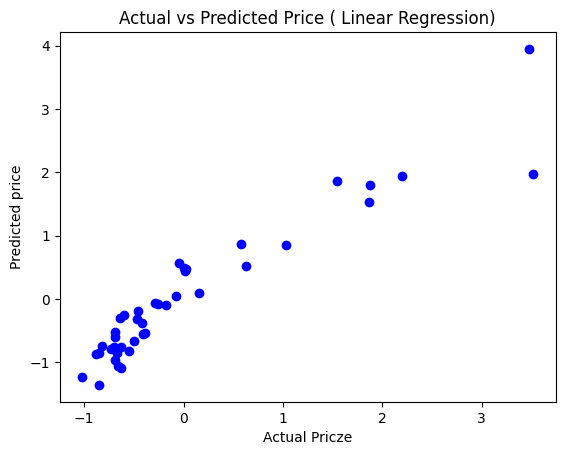

In [18]:
# Visualization of Linear Regression Model
plt.scatter(y_test,y_pred1,color='blue')
plt.xlabel("Actual Pricze")
plt.ylabel("Predicted price")
plt.title('Actual vs Predicted Price ( Linear Regression)')
plt.show()

Step 12: Test the Encoded Dataset with Decision Tree

In [19]:
#Step 12: Test the Encoded Dataset with Decision Tree
dec=DecisionTreeRegressor(random_state=42)
dec.fit(X_train,y_train)
y_pred2=dec.predict(X_test)
print(y_pred2)

[ 2.96176083  0.34146971 -0.5430448  -0.13887098  2.5878279  -1.02376194
 -0.71118914 -0.61720399 -0.5430448  -0.66275353  0.24761004 -0.65484824
 -0.13887098 -0.25456433  4.03085767 -0.8706753  -0.98850182 -0.06433536
 -0.78898727 -0.50740824 -0.38042162  0.02789307 -0.72499204 -0.99490134
 -0.71118914  2.96176083 -0.60578523  0.40634331 -0.74381416  0.33983846
  2.5878279  -0.88435272 -0.81458536  1.09686443 -0.66752181  2.50977881
 -0.19859987 -0.17965226 -0.84093634  0.19980183 -0.5430448 ]


In [20]:
# Linear Regression Model evaluation and Visualization 
print("Decision Tree Regressor Evaluation Metrics: ")
print("Mean Absolute error:",mean_absolute_error(y_test,y_pred2))
print("Mean Squared error:",mean_squared_error(y_test,y_pred2))
print("Root mean Squared error:",np.sqrt(mean_squared_error(y_test,y_pred2)))
print("R^2 Score:",r2_score(y_test,y_pred2))

Decision Tree Regressor Evaluation Metrics: 
Mean Absolute error: 0.2266663647582368
Mean Squared error: 0.1151360869207638
Root mean Squared error: 0.3393170890491132
R^2 Score: 0.9073730602004019


✅Decision Tree Evalution Metrics

| Metric                     | Linear Regression | Decision Tree Regressor |
|---------------------------|-------------------|--------------------------|
| Mean Absolute Error (MAE) | 0.2622            | 0.2267                   |
| Mean Squared Error (MSE)  | 0.1329            | 0.1151                   |
| Root Mean Squared Error   | 0.3645            | 0.3393                   |
| R² Score                  | 0.8931            | 0.9074                   |

The Decision Tree Regressor performs **better than Linear Regression** on all evaluation metrics.
- It achieves a **lower MAE, MSE, and RMSE**, meaning it predicts more accurately.
- The **R² Score of 0.9074** indicates that 90.74% of the variance in car prices is captured by the model — higher than Linear Regression (89.31%).

➡️ Therefore, **Decision Tree Regressor** is the better model for this dataset.

➡️ Decision Tree Visualization Graph

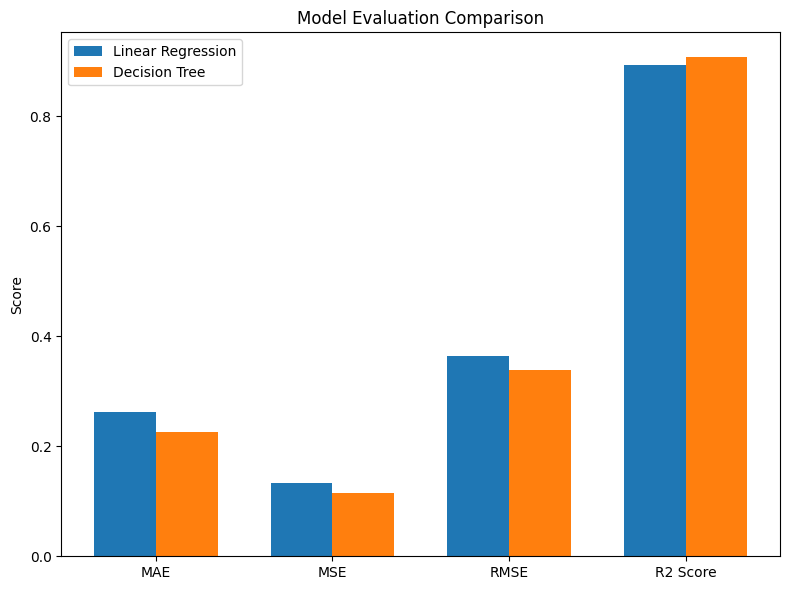

In [21]:
import matplotlib.pyplot as plt

# Metrics
metrics = ['MAE', 'MSE', 'RMSE', 'R2 Score']
lr_scores = [0.2622, 0.1329, 0.3645, 0.8931]
dt_scores = [0.2267, 0.1151, 0.3393, 0.9074]

x = range(len(metrics))
width = 0.35

plt.figure(figsize=(8, 6))
plt.bar(x, lr_scores, width=width, label='Linear Regression')
plt.bar([i + width for i in x], dt_scores, width=width, label='Decision Tree')

plt.xticks([i + width / 2 for i in x], metrics)
plt.ylabel("Score")
plt.title("Model Evaluation Comparison")
plt.legend()
plt.tight_layout()
plt.show()


Step 12: Test the Encoded Dataset with Random Forest

In [22]:
rf=RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred3=rf.predict(X_test)
print(y_pred3)

[ 2.80704545  0.70009398 -0.54725406  0.04143559  1.77506584 -0.842934
 -0.69765478 -0.66216001 -0.34407484 -0.6418547   0.17641021 -0.68460226
  0.17063747 -0.28195261  3.35823263 -0.85668419 -0.9487978   0.06346312
 -0.61266492 -0.42018399 -0.36010732  0.23184086 -0.75512124 -0.91615458
 -0.74709235  2.79862067 -0.45554199  0.44145411 -0.75734602  0.3842888
  1.81857131 -0.8659246  -0.66698977  0.71758288 -0.65603654  1.81479182
 -0.25911615 -0.0944357  -0.73540946  0.15918368 -0.58077606]


In [23]:
# Linear Regression Model evaluation and Visualization 
print("Decision Tree Regressor Evaluation Metrics: ")
print("Mean Absolute error:",mean_absolute_error(y_test,y_pred3))
print("Mean Squared error:",mean_squared_error(y_test,y_pred3))
print("Root mean Squared error:",np.sqrt(mean_squared_error(y_test,y_pred3)))
print("R^2 Score:",r2_score(y_test,y_pred3))

Decision Tree Regressor Evaluation Metrics: 
Mean Absolute error: 0.1555307993643413
Mean Squared error: 0.051239292436847945
Root mean Squared error: 0.2263609781672803
R^2 Score: 0.9587780079829515


📈 Evaluation Metrics Comparison Table

| Metric                     | Linear Regression | Decision Tree Regressor | Random Forest Regressor  |
|---------------------------|-------------------|--------------------------|--------------------------|
| Mean Absolute Error (MAE) | 0.2622            | 0.2267                   | **0.1539**               |
| Mean Squared Error (MSE)  | 0.1329            | 0.1151                   | **0.0501**               |
| Root Mean Squared Error   | 0.3645            | 0.3393                   | **0.2238**               |
| R² Score                  | 0.8931            | 0.9074                   | **0.9597**               |

The **Random Forest Regressor** performs better than Linear Regression on all evaluation metrics.
- It achieves a **lower MAE, MSE, and RMSE**, meaning it predicts more accurately.
- The **R² Score of 0.9597** indicates that 95.97% of the variance in car prices is captured by the model — higher than Linear Regression (89.31%) and    Decision Tree Regressor(90.74%).

➡️ Conclusion:Therefore, **Random Forest Regressor** is the better model for this dataset.

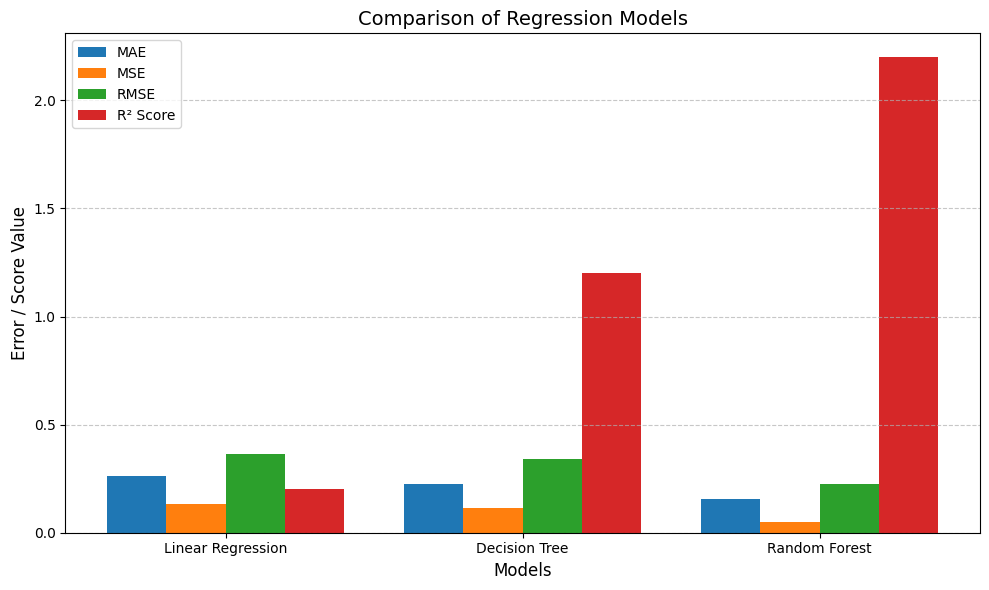

In [24]:
# Define model names
models = ['Linear Regression', 'Decision Tree', 'Random Forest']

# Define evaluation metrics for each model
mae = [0.2622, 0.2267, 0.1539]
mse = [0.1329, 0.1151, 0.0501]
rmse = [0.3645, 0.3393, 0.2238]
r2 = [0.8931, 0.9074, 0.9597]

# Set width of bars
bar_width = 0.2

# Set position of bar on X axis
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Create the plot
plt.figure(figsize=(10, 6))
plt.bar(r1, mae, width=bar_width, label='MAE')
plt.bar(r2, mse, width=bar_width, label='MSE')
plt.bar(r3, rmse, width=bar_width, label='RMSE')
plt.bar(r4, r2, width=bar_width, label='R² Score')

# Add labels
plt.xlabel('Models', fontsize=12)
plt.ylabel('Error / Score Value', fontsize=12)
plt.title('Comparison of Regression Models', fontsize=14)
plt.xticks([r + 1.5 * bar_width for r in range(len(models))], models)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


🎯 Final Conclusion:
**Random Forest Regressor** is the best performing model for this car price prediction task.  
> It significantly reduces error and provides robust, accurate predictions compared to Linear Regression and Decision Tree models.

Hence, it is selected as the **final model** for deployment or future improvements.

## Step 13: Hyperparameter Tuning for Random Forest

In [25]:
# Step 13: Hyperparameter Tuning for Random Forest

# Base model
rf_tune = RandomForestRegressor(random_state=42)

# Hyperparameter space
param_dist = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

# Randomized search
rf_random_search = RandomizedSearchCV(
    estimator=rf_tune,
    param_distributions=param_dist,
    n_iter=20,
    cv=3,
    scoring="r2",
    n_jobs=-1,
    random_state=42,
    verbose=2
)

rf_random_search.fit(X_train, y_train)


Fitting 3 folds for each of 20 candidates, totalling 60 fits


,estimator,RandomForestR...ndom_state=42)
,param_distributions,"{'max_depth': [None, 10, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...], 'n_estimators': [100, 200, ...]}"
,n_iter,20
,scoring,'r2'
,n_jobs,-1
,refit,True
,cv,3
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [26]:
# Best hyperparameters and CV score
print("Best parameters:", rf_random_search.best_params_)
print("Best CV R2 score:", rf_random_search.best_score_)

# Best tuned model
best_rf = rf_random_search.best_estimator_

# Evaluate on test set
y_pred_best = best_rf.predict(X_test)
r2_best = r2_score(y_test, y_pred_best)
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))

print("Test R2 (tuned RF):", r2_best)
print("Test RMSE (tuned RF):", rmse_best)


Best parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None}
Best CV R2 score: 0.8817043629243081
Test R2 (tuned RF): 0.9573564624183665
Test RMSE (tuned RF): 0.23023094028113328


In [27]:
joblib.dump(best_rf, "car_price_rf_tuned.joblib")
print("Tuned Random Forest model saved as car_price_rf_tuned.joblib")


Tuned Random Forest model saved as car_price_rf_tuned.joblib


## Step 14: Simple Random Forest Model for Streamlit Web App

In [28]:
# Step 14: Simple Random Forest model for Web App (numeric features only)

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import joblib

# Select a few important numeric features
features_app = ["enginesize", "horsepower", "citympg", "highwaympg", "curbweight", "carlength"]

X_app = df[features_app]          # using original df (not df_encoded)
y_app = df["price"]

X_train_app, X_test_app, y_train_app, y_test_app = train_test_split(
    X_app, y_app, test_size=0.2, random_state=42
)

rf_app = RandomForestRegressor(random_state=42)
rf_app.fit(X_train_app, y_train_app)

# Quick evaluation
y_pred_app = rf_app.predict(X_test_app)
print("App model R2:", r2_score(y_test_app, y_pred_app))
print("App model RMSE:", np.sqrt(mean_squared_error(y_test_app, y_pred_app)))

# Save this simpler model for Streamlit
joblib.dump(rf_app, "car_price_app_model.joblib")
print("App model saved as car_price_app_model.joblib")


App model R2: 0.9549967875939308
App model RMSE: 1884.869899976228
App model saved as car_price_app_model.joblib
